# Ejercicio 1 - PCA

Tomar el sample dataset de `diabetes` de la librería `sklearn` y realizar la reducción de dimensionalidad correspondiente para obtener la extracción de características `feature extraction`. Describir el proceso y su resultado

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target #TODO
print(X.shape)
print(y.shape)

(442, 10)
(442,)


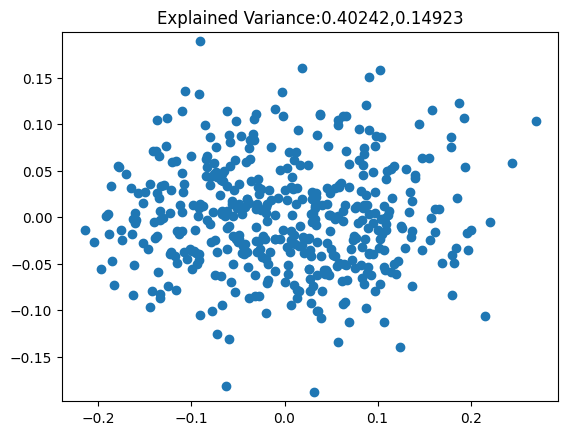

In [3]:
pca=PCA(n_components=2) #TODO
pca.fit(X) #TODO
a,b = pca.explained_variance_ratio_ #TODO pca.explained_variance_
a = a.round(5) # Rendoar valores para poder mostrarlos como título
b = b.round(5) # Rendoar valores para poder mostrarlos como título
Z=pca.transform(X)
plt.title('Explained Variance:' + str(a) + ',' + str(b))
plt.axis('equal')
plt.scatter(Z[:,0], Z[:,1]);

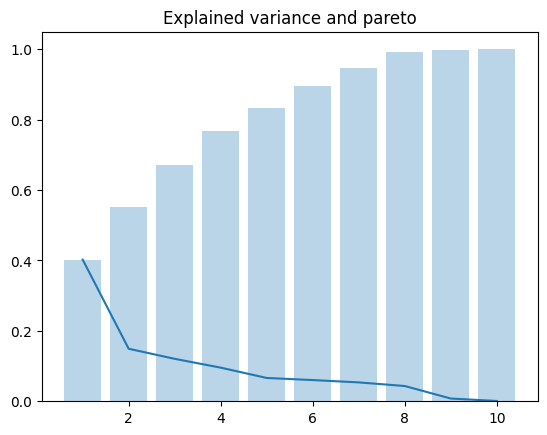

In [4]:
pca=PCA() #TODO
pca.fit(X) #TODO
plt.plot(range(1,11),pca.explained_variance_ratio_)
plt.bar(range(1,11),np.cumsum(pca.explained_variance_ratio_), alpha=.3)
plt.title("Explained variance and pareto")
plt.show()

In [5]:
print ('Percentage of variance explained (2 components): ', np.cumsum(pca.explained_variance_ratio_)[1]*100)
print ('Percentage of variance explained (3 components): ', np.cumsum(pca.explained_variance_ratio_)[2]*100)
print ('Percentage of variance explained (4 components): ', np.cumsum(pca.explained_variance_ratio_)[3]*100)
print ('Percentage of variance explained (5 components): ', np.cumsum(pca.explained_variance_ratio_)[4]*100)
print ('Percentage of variance explained (6 components): ', np.cumsum(pca.explained_variance_ratio_)[5]*100)
print ('Percentage of variance explained (7 components): ', np.cumsum(pca.explained_variance_ratio_)[6]*100)
print ('Percentage of variance explained (8 components): ', np.cumsum(pca.explained_variance_ratio_)[7]*100)

Percentage of variance explained (2 components):  55.16530427751478
Percentage of variance explained (3 components):  67.2249668687648
Percentage of variance explained (4 components):  76.77973090140596
Percentage of variance explained (5 components):  83.40154481406769
Percentage of variance explained (6 components):  89.42871557026895
Percentage of variance explained (7 components):  94.79437209346273
Percentage of variance explained (8 components):  99.13119245711856


In [6]:
rng=np.random.RandomState(0)
X=rng.randn(3,400)
p=rng.rand(10,3)  # Random projection into 10d
X=np.dot(p, X)
print(X)

[[ 0.4891489   0.05331736  0.22206019 ... -0.38084297 -0.71682684
   0.07960158]
 [ 1.43327136  0.08236987  0.83741626 ... -0.56888509 -1.0661402
   0.30652977]
 [ 0.39117808 -0.22450206  0.56194345 ... -0.00355792  0.28652033
   0.00938993]
 ...
 [-0.35164664 -0.99714767  0.79151041 ... -1.11453672 -0.63849744
  -0.72193644]
 [ 1.34095136 -0.32676544  1.33260878 ... -0.2610145  -0.01341865
   0.16976249]
 [ 1.34454622  0.55682337  0.22536013 ... -0.3262513  -1.25934636
   0.52731505]]


[5.26307764e-01 3.32367134e-01 1.41325102e-01 5.23060677e-32
 4.18089654e-32 1.54020600e-32]


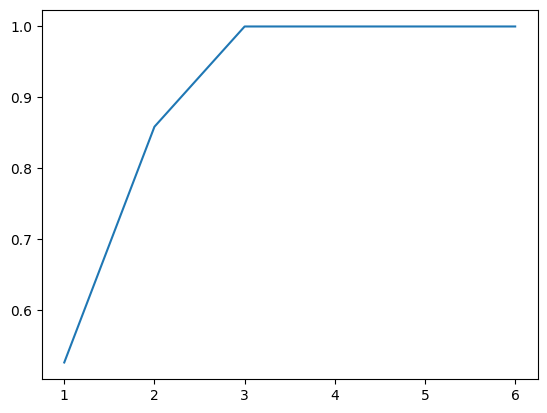

In [7]:
pca=PCA(n_components=6)
pca.fit(X) #TODO
v= pca.explained_variance_ratio_ #TODO pca.explained_variance_
print(v)
plt.plot(np.arange(1,7), np.cumsum(v));

# Ejercicio 2 Segmentación de imágenes con K-Means

Hemos hablado de los beneficios de varios algoritmos para segmentación de imágenes, como es el caso de `meanshift`.
Para el siguiente ejemplo, debes implementar segmentación de imágenes utilizando nuestro algoritmo más básico de agrupamiento.
Utilizar la imágen `./data/montevideo.jpg`

In [8]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from scipy import ndimage
import warnings
warnings.filterwarnings("ignore")

(471, 850, 3)


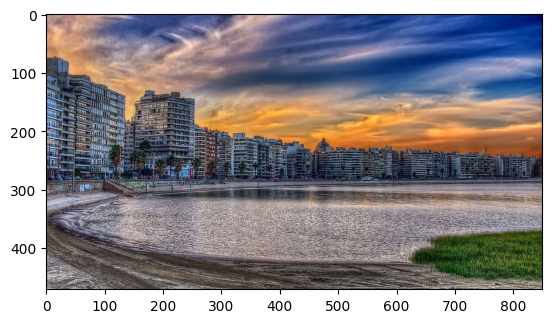

In [10]:
pic = plt.imread('montevideo.jpg')/255  #TODO dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic) #TODO

In [11]:
pic_n = pic.reshape(471 * 850, 3) #TODO
pic_n.shape

(400350, 3)

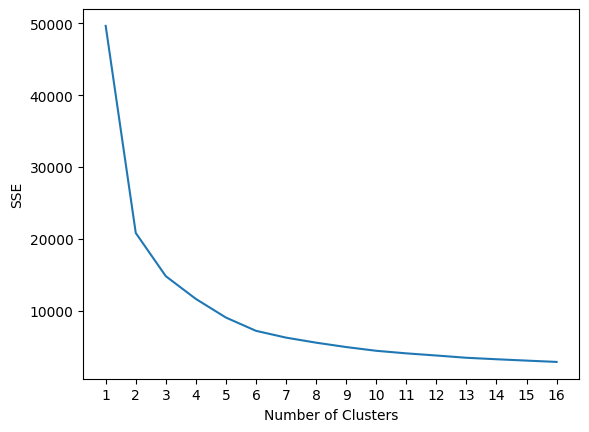

In [12]:
#TODO - Plot del codo
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 17):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pic_n)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 17), sse)
plt.xticks(range(1, 17))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [13]:
# Tomar el valor k resultante del plot anterior.
# Probar otros valores de K para ver su resultado
kmeans = KMeans(n_clusters=16).fit(pic_n) #TODO
pic2show = kmeans.cluster_centers_[kmeans.predict(pic_n)] #TODO

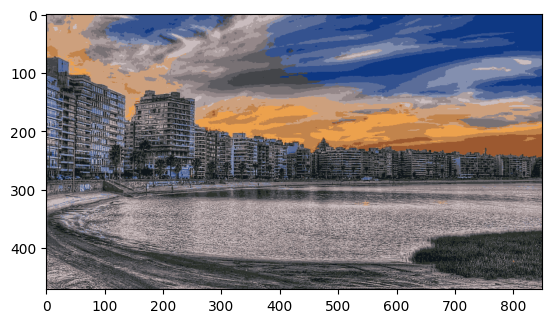

In [14]:
cluster_pic = pic2show.reshape((471, 850, 3)) #TODO
plt.imshow(cluster_pic) #TODO

# Ejercicio 3 - GAN

Importar el dataset de `CIFAR10 data` y construir un generador.

[Información del dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

>Note: Se recomienda ejecutar todo el notebook o a partir de este ejercicio en COLAB

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from os import listdir, makedirs
from os.path import join, exists, expanduser
import keras
from keras import layers
import os
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
from keras.datasets import cifar10
import warnings
warnings.filterwarnings("ignore")

In [22]:
latent_dim = 32
height = 32
width = 32
channels = 3

generator_input = keras.Input(shape=(latent_dim,))

# First, transform the input into a 16x16 128-channels feature map
x = layers.Dense(128 * 16 * 16)(generator_input)
x = layers.LeakyReLU()(x)#TODO Completar la función de activación luego del . y el último paréntisis
x = layers.Reshape((16, 16, 128))(x)#TODO

# Then, add a convolution layer
x = layers.Conv2D(256, 5, padding='same')(x)#TODO
x = layers.LeakyReLU()(x)#TODO Completar la función de activación luego del . y el último paréntisis

# Upsample to 32x32
x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)#TODO
x = layers.LeakyReLU()(x)#TODO Completar la función de activación luego del . y el último paréntisis

# Few more conv layers
x = layers.Conv2D(256, 5, padding='same')(x)#TODO
x = layers.LeakyReLU()(x)#TODO Completar la función de activación luego del . y el último paréntisis
x = layers.Conv2D(256, 5, padding='same')(x)#TODO
x = layers.LeakyReLU()(x)#TODO Completar la función de activación luego del . y el último paréntisis

# Produce a 32x32 1-channel feature map
x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)#TODO
generator = keras.models.Model(generator_input, x)
generator.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32)]              0         
                                                                 
 dense_6 (Dense)             (None, 32768)             1081344   
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 32768)             0         
                                                                 
 reshape_3 (Reshape)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 256)       819456    
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 32, 32, 256)       1048

In [23]:
discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)#TODO Completar la función de activación luego del . y el último paréntisis
x = layers.Conv2D(128, 4, strides=2)(x)#TODO
x = layers.LeakyReLU()(x)#TODO Completar la función de activación luego del . y el último paréntisis
x = layers.Conv2D(128, 4, strides=2)(x)#TODO
x = layers.LeakyReLU()(x)#TODO Completar la función de activación luego del . y el último paréntisis
x = layers.Conv2D(128, 4, strides=2)(x)#TODO
x = layers.LeakyReLU()(x)#TODO Completar la función de activación luego del . y el último paréntisis
x = layers.Flatten()(x) #TODO

# One dropout layer - important trick!
x = layers.Dropout(0.4)(x)#TODO

# Classification layer
x = layers.Dense(1, activation='sigmoid')(x) #TODO

discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()

# To stabilize training, we use learning rate decay
# and gradient clipping (by value) in the optimizer.
discriminator_optimizer = keras.optimizers.RMSprop()
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 30, 30, 128)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 128)       262272    
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 6, 6, 128)         262272    
                                                                 
 leaky_re_lu_34 (LeakyReLU)  (None, 6, 6, 128)         0  

In [24]:
# Set discriminator weights to non-trainable
# (will only apply to the `gan` model)
discriminator.trainable = False

gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)

gan_optimizer = keras.optimizers.RMSprop()
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')
gan.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32)]              0         
                                                                 
 model_9 (Functional)        (None, 32, 32, 3)         6264579   
                                                                 
 model_10 (Functional)       (None, 1)                 790913    
                                                                 
Total params: 7055492 (26.91 MB)
Trainable params: 6264579 (23.90 MB)
Non-trainable params: 790913 (3.02 MB)
_________________________________________________________________


In [25]:
# Load CIFAR10 data
(x_train, y_train), (_, _) = cifar10.load_data() #TODO

# Select frog images (class 6)
x_train = x_train[y_train.flatten() == 0]

# Normalize data
x_train = x_train.reshape(
    (x_train.shape[0],) + (height, width, channels)).astype('float32') / 255.

iterations = 200
batch_size = 256
save_dir = './data/output/gan_images/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Start training loop
start = 0
for step in range(iterations):
    # Sample random points in the latent space
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

    # Decode them to fake images
    generated_images = generator.predict(random_latent_vectors)

    # Combine them with real images
    stop = start + batch_size
    real_images = x_train[start: stop]
    combined_images = np.concatenate([generated_images, real_images])

    # Assemble labels discriminating real from fake images
    labels = np.concatenate([np.ones((batch_size, 1)),
                             np.zeros((batch_size, 1))])
    # Add random noise to the labels - important trick!
    labels += 0.05 * np.random.random(labels.shape)

    # Train the discriminator
    d_loss = discriminator.train_on_batch(combined_images, labels)

    # sample random points in the latent space
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

    # Assemble labels that say "all real images"
    misleading_targets = np.zeros((batch_size, 1))

    # Train the generator (via the gan model,
    # where the discriminator weights are frozen)
    a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)

    start += batch_size
    if start > len(x_train) - batch_size:
      start = 0

    # Occasionally save / plot
    if step % 100 == 0:
        # Save model weights
        gan.save_weights('./data/output/gan.h5')

        # Print metrics
        print('discriminator loss at step %s: %s' % (step, d_loss))
        print('adversarial loss at step %s: %s' % (step, a_loss))

8/8 [==============================] - 0s 8ms/step
discriminator loss at step 0: 0.6926906108856201
adversarial loss at step 0: 0.6654649972915649
8/8 [==============================] - 0s 8ms/step
discriminator loss at step 100: 0.20024104416370392
adversarial loss at step 100: 3.164541244506836
8/8 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 96ms/step


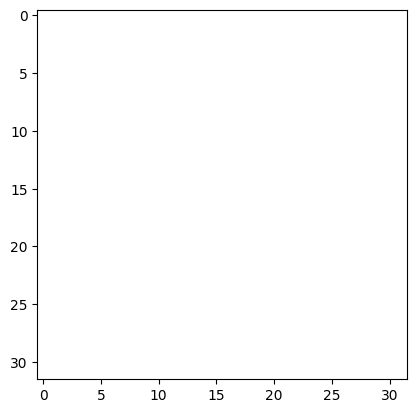

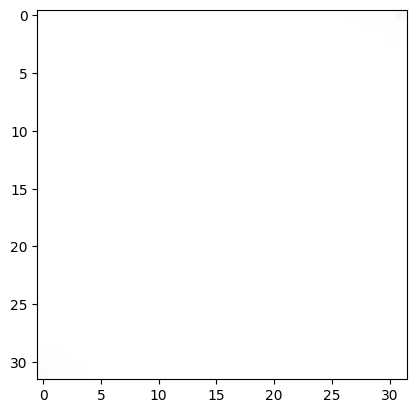

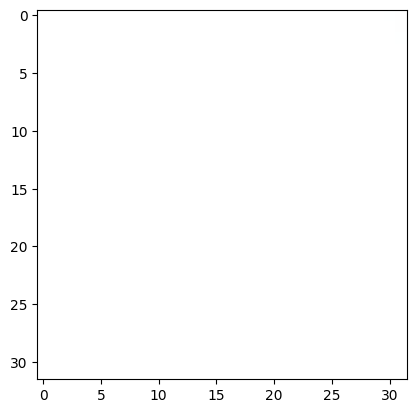

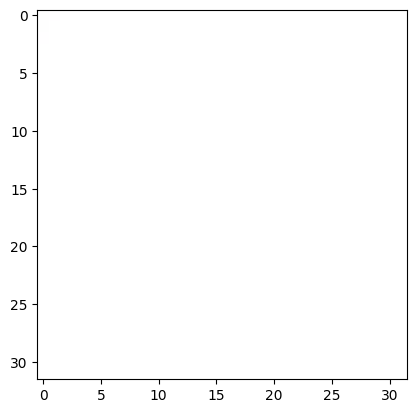

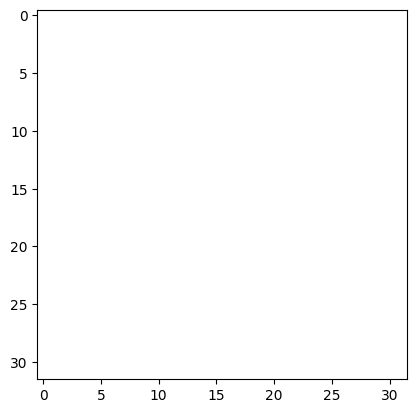

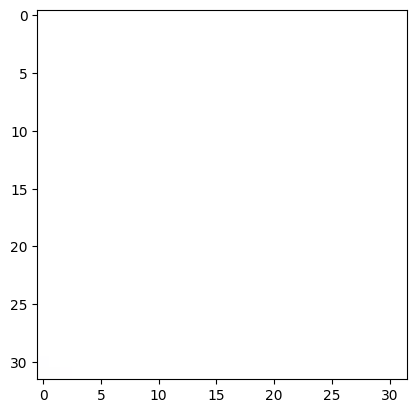

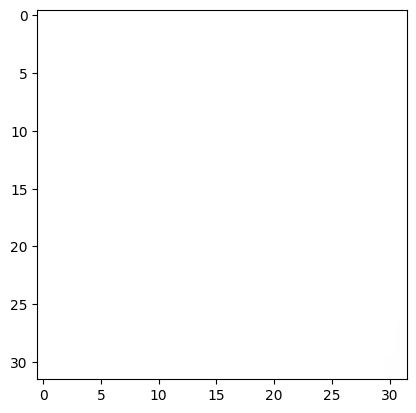

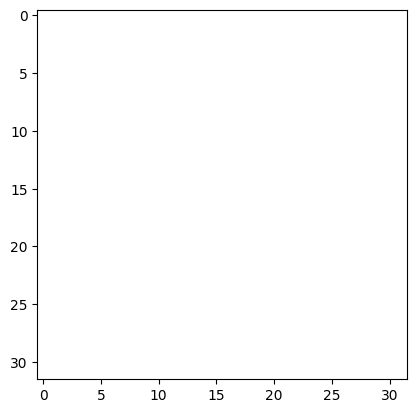

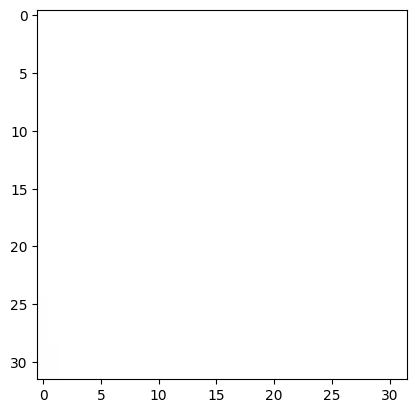

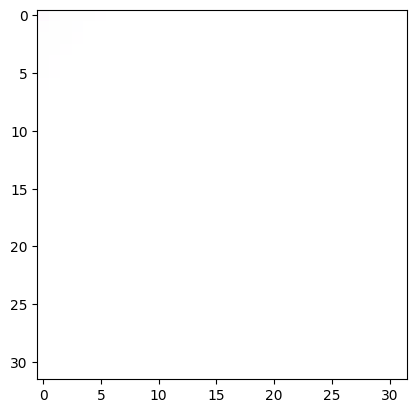

In [26]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Sample random points in the latent space
random_latent_vectors = np.random.normal(size=(10, latent_dim))

# Decode them to fake images
generated_images = generator.predict(random_latent_vectors)

for i in range(generated_images.shape[0]):
    img = image.array_to_img(generated_images[i] * 255., scale=False)
    plt.figure()
    plt.imshow(img)

plt.show()


# Ejercicio 4 - VAE (Opcional)

Tomando cualquier dataset que desees, implementa tu `VAE`

In [27]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
import keras
from keras import layers
from keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt